In [478]:
# todo: generate plots to visualize my location data

from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gp
import contextily as cx
import os
import json

# Location History dir copied from my Google Takeout download
locdir = os.path.join('.','Location History')
imagedir = os.path.join('.','Images')
# os.chdir(os.path.join(os.getcwd(),'Location History'))

def savefigure(fname):
    assert len(fname.split(".")), "fname should have exactly one period '.', before the extension"
    fname = fname.split('.')
    fname = fname[0] + '_' +str(int(10000*random.rand())) + '.' + fname[1]
    filepath = os.path.join(imagedir,fname)
    plt.savefig(filepath, bbox_inches='tight')
    print("saved file to",filepath)
    
def savecsv(fname,data):
    assert len(fname.split(".")), "fname should have exactly one period '.', before the extension"
    fname = fname.split('.')
    fname = fname[0] + '_' +str(int(10000*random.rand())) + '.' + fname[1]
    filepath = os.path.join(imagedir,fname)
    savetxt(filepath,data) # from numpy
    print("saved file to",filepath)

In [498]:
def hist2d(data,nx,ny=None,xlims=None,ylims=None):
    """
    returns a 2d array of occurence for a 2d-tuple coordinates within ny by nx bins
    
    args:
        data: 2d array or list of coordinates [[x1,x2,...],[y1,y2,...]]
        nx: equal to the number of evenly spaced "vertical" slices to be made plus one when cutting up the data space
        ny: like binsx but "horizontal" slices.
        xlims: a tuple of limits (xmin,xmax) of type float
        ylims: a tuple of limits (ymin,ymax) of type float
    returns:
        counts: 2d array of shape (ny,nx) containing the number of occurences of data in each bin
        xlims: a tuple (xmin,xmax)
        ylims: a tuple (ymin,ymax)
        
    1. get the min/max of the x and y data if not specified
    2. bins pairs in x by the x values
    3. for each x bin, bins the pairs by y values
    """
    if ny==None:
        ny=nx
        
    xd,yd = data
    if not (xlims or ylims):
        data = array([(x,y) for x,y in zip(xd,yd)],dtype='object')
 
    if xlims != None:
        xmin,xmax = xlims
        data = array([(x,y) for x,y in zip(xd,yd) if xmin<x<xmax],dtype='object')
    else:
        xmin = min(xd)
        xmax = max(xd)
        # we do not filter the data here, bc we are using its full range in x
    if ylims != None:
        ymin,ymax = ylims
        data = array([(x,y) for x,y in zip(xd,yd) if ymin<y<ymax],dtype='object')
    else:
        ymin = min(yd)
        ymax = max(yd)
        # we do not filter the data here, bc we are using its full range in y
    
    print(ymin,ymax,xmin,xmax)
    
    xbins = array([[p for p in data if xmin+(xmax-xmin)*(i/nx)<=p[0]<=xmax-(xmax-xmin)*((nx-i-1)/nx)] 
                    for i in range(nx)],dtype='object')
    counts = empty((ny,nx))
    for xi,xb in enumerate(xbins):
        ybins = array([[p for p in xb if
                        ymin+(ymax-ymin)*(i/ny)<=p[1]<=ymax-(ymax-ymin)*((ny-i-1)/ny)] 
                        for i in range(ny)],dtype='object')
        counts[:,xi] = [len(yb) for yb in flip(ybins)]
    return counts, (xmin,xmax), (ymin,ymax)

## map plot test

In [34]:
f = open(os.path.join('GeoData','Madison','citylimit.json'))
citydata = json.load(f)
f.close()

In [38]:
madshp = gp.read_file(os.path.join('GeoData','Madison','city_limit.shp'))

<AxesSubplot:>

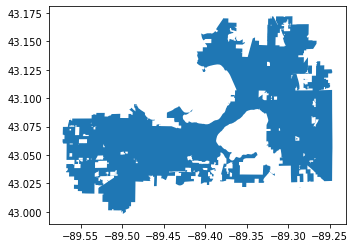

In [39]:
madshp.plot()

## Madison

#todo
* make imshow colormap have a transparency gradient so a map can be shown beneath the heatmap
* make a 3D view topographical map

In [40]:
# load location data
f = open(os.path.join(locdir,'Records.json'))
locdata = json.load(f)
f.close()

city = gp.read_file(os.path.join('GeoData','Madison','city_limit.shp'))

In [41]:
locdata.keys()

dict_keys(['locations'])

In [42]:
# convert dictionary into usable 
preview = locdata['locations'][:5]
preview

[{'latitudeE7': 452865402,
  'longitudeE7': -937866040,
  'accuracy': 30,
  'activity': [{'activity': [{'type': 'TILTING', 'confidence': 100}],
    'timestamp': '2014-08-12T01:34:49.431Z'},
   {'activity': [{'type': 'STILL', 'confidence': 51},
     {'type': 'UNKNOWN', 'confidence': 40},
     {'type': 'IN_VEHICLE', 'confidence': 6},
     {'type': 'ON_FOOT', 'confidence': 3},
     {'type': 'UNKNOWN', 'confidence': 3}],
    'timestamp': '2014-08-12T03:11:42.431Z'}],
  'source': 'WIFI',
  'deviceTag': 2132162846,
  'timestamp': '2014-08-12T03:12:09.496Z'},
 {'latitudeE7': 452865609,
  'longitudeE7': -937866826,
  'accuracy': 30,
  'source': 'WIFI',
  'deviceTag': 2132162846,
  'timestamp': '2014-08-12T03:13:09.525Z'},
 {'latitudeE7': 452866329,
  'longitudeE7': -937866826,
  'accuracy': 30,
  'source': 'WIFI',
  'deviceTag': 2132162846,
  'timestamp': '2014-08-12T03:14:10.039Z'},
 {'latitudeE7': 452865609,
  'longitudeE7': -937866443,
  'accuracy': 30,
  'activity': [{'activity': [{'type':

In [29]:
array([[x['latitudeE7']*1e-7,x['longitudeE7']*1e-7] for x in preview])

array([[ 45.2865402, -93.786604 ],
       [ 45.2865609, -93.7866826],
       [ 45.2866329, -93.7866826],
       [ 45.2865609, -93.7866443],
       [ 45.2865673, -93.7867319]])

In [43]:
coords = array([[x['latitudeE7']*1e-7,x['longitudeE7']*1e-7] for x in locdata['locations']])
lat,lon = coords.transpose()

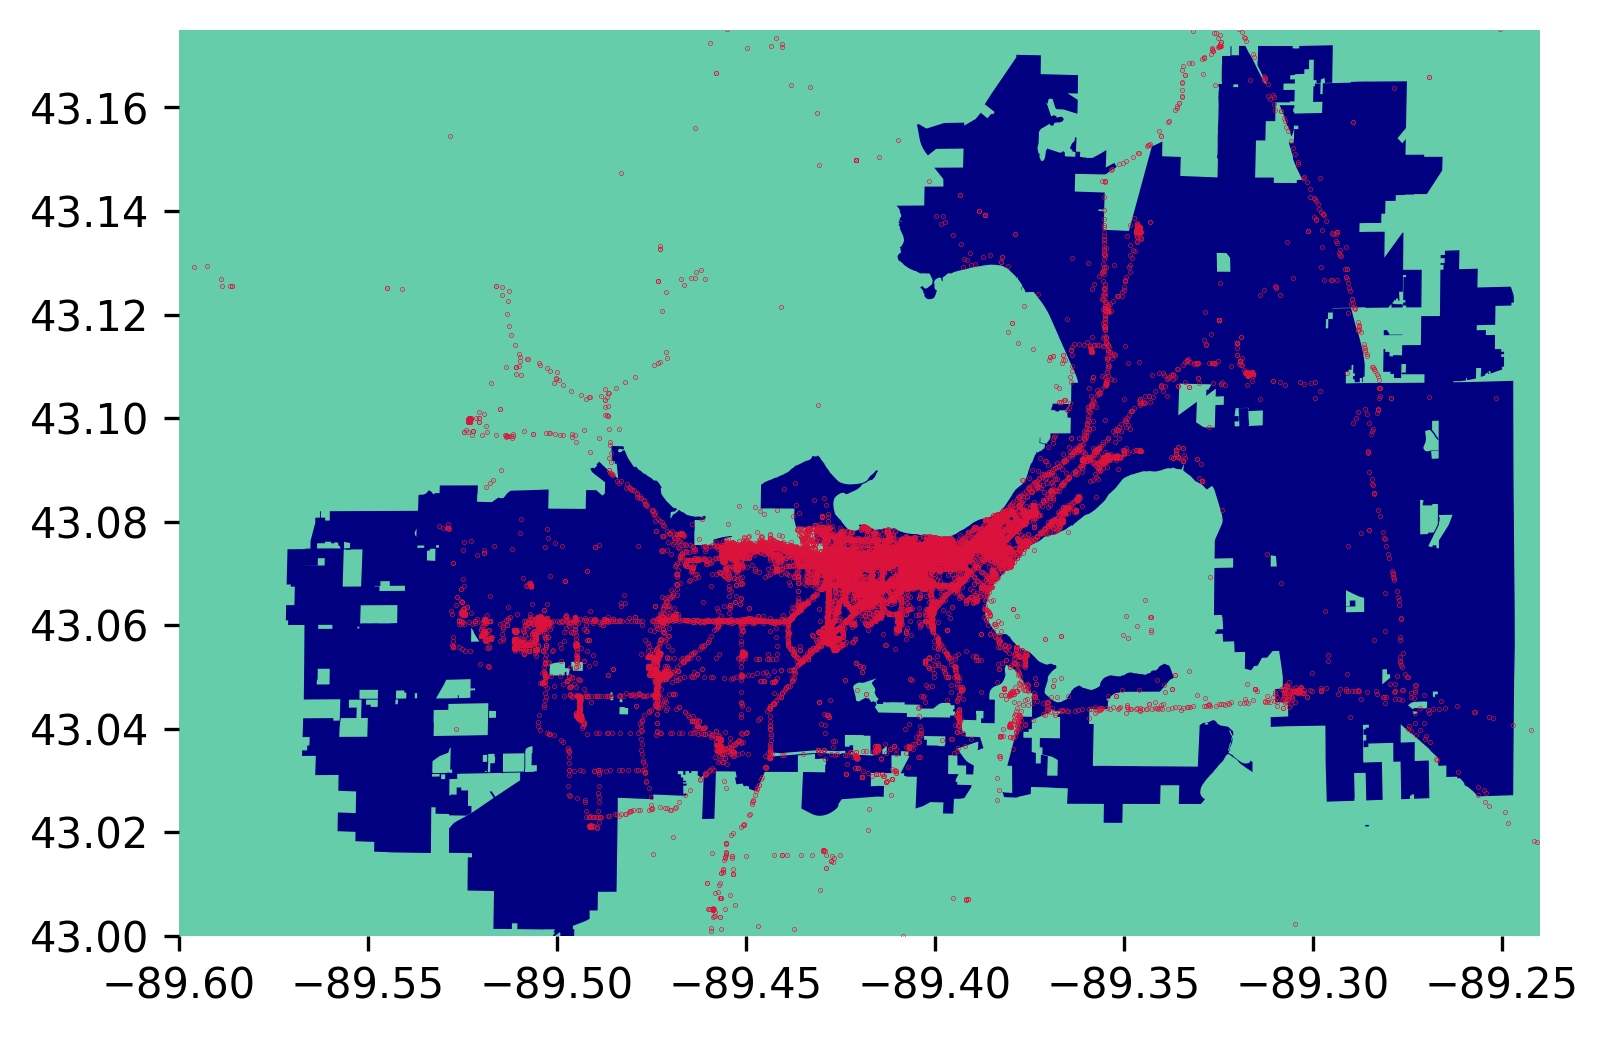

In [306]:
fig, ax = plt.subplots(dpi=300)
city.plot(ax=ax,color='navy')
ax.scatter(lon,lat,s=.1,marker='.',color='crimson')
ax.set_facecolor('mediumaquamarine')
ax.set_xlim((-89.6,-89.24))
ax.set_ylim((43,43.175))
# ax.set_axis_off()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])
plt.show()
# plt.savefig('madison_city_limits_loc_data_20220310_v1.png')

In [500]:
## 2d hist of location data
nx=60 #1000
ny=int(nx*(16/35)+0.5) #27
xmin = -89.6
xmax = -89.24
ymin = 43
ymax = 43.175
counts,xlims,ylims=hist2d([lon,lat],nx,ny=ny,xlims=(xmin,xmax),ylims=(ymin,ymax))
xmin,xmax = xlims
ymin,ymax = ylims

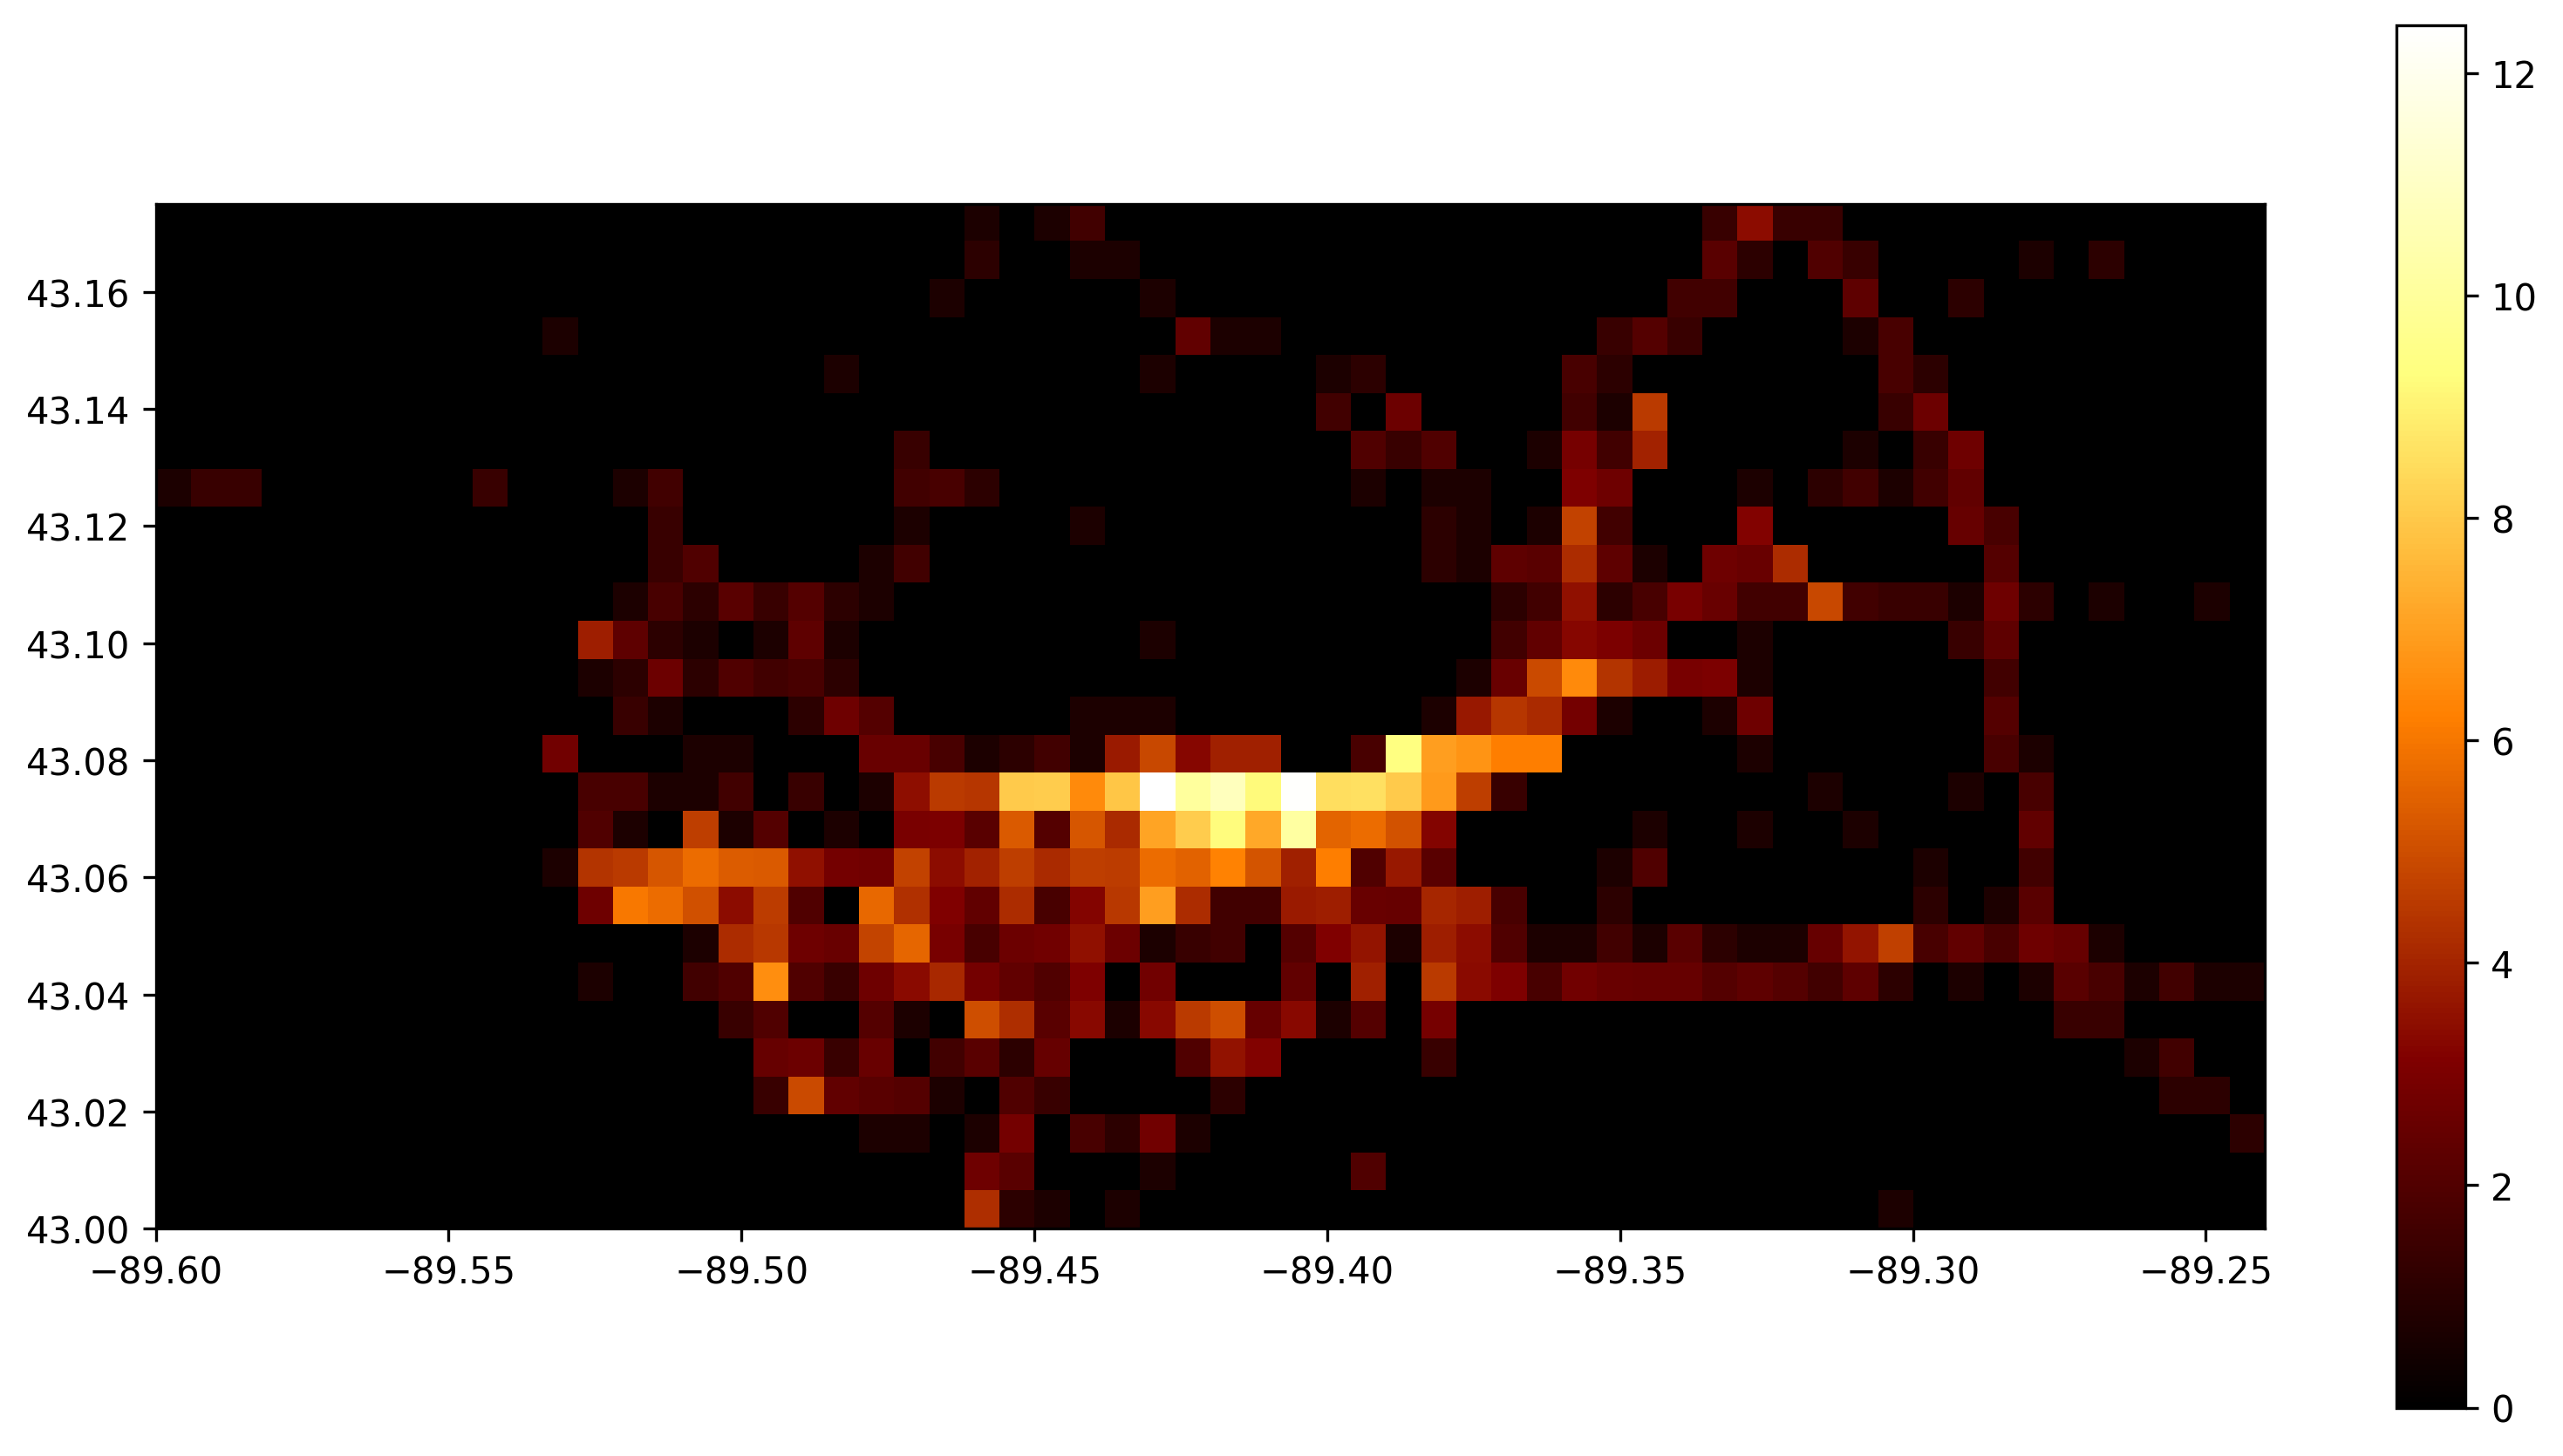

In [502]:
full=True #False # don't impose axes limits

fig,ax = plt.subplots(dpi=300,figsize=(13,7))
cmap = 'afmhot'
# ax.scatter(lon,lat,s=0.1,marker='.',c='red')
cax = ax.imshow(log(counts+1),extent=[xmin,xmax,ymin,ymax],cmap=cmap)#,interpolation='gaussian')
# cax = ax.contour(log(flipud(counts)+1),extent=[xmin,xmax,ymin,ymax])
if not full:
    ax.set_xlim((-89.45,-89.35))
    ax.set_ylim((43.04,43.10))
fig.colorbar(cax)
# ax.clabel(cax, inline=True, fontsize=10)
# fig.dpi=300
# plt.savefig(f'madison_heatmap_nx{nx}_ny{ny}_isfull{full}.png',bbox_inches='tight')
# savetxt(f'madison_heatmap_nx{nx}_ny{ny}_m89pt6_m89pt24_43_43pt175.csv',counts)
fullstr = 'full' if full else 'm89pt6_m89pt24_43_43pt175'
# savefigure(f'madison_heatmap_nx{nx}_ny{ny}_{fullstr}.png')
# savecsv(f'madison_heatmap_nx{nx}_ny{ny}_{fullstr}.csv',counts)

In [600]:
# load data from a saved file
counts = loadtxt(os.path.join(imagedir,'madison_heatmap_nx1000_ny457_m89pt6_m89pt24_43_43pt175_7147.csv')) # from numpy

In [546]:
len(lon)

1079888

[90, 92, 88, 32, 5, 90, 30, 4, 72, 95, 13, 52, 31, 52, 72, 24, 78, 19, 52, 70]

In [568]:
array(range(100))[[random.randint(100) for x in range(20)]]

array([83, 72, 82, 47, 38, 59,  7, 97,  7, 55, 22,  7, 26, 97, 92,  4, 48,
       73, 44,  9])

In [598]:
# limit the data to the madison area
xmin = -89.6
xmax = -89.24
ymin = 43
ymax = 43.175
xd,yd = array([[x,y] for x,y in zip(lon,lat) if xmin<x<xmax and ymin<y<ymax]).transpose()

saved file to .\Images\madison_heatmap_nx50_ny50_full_jet_6616.png


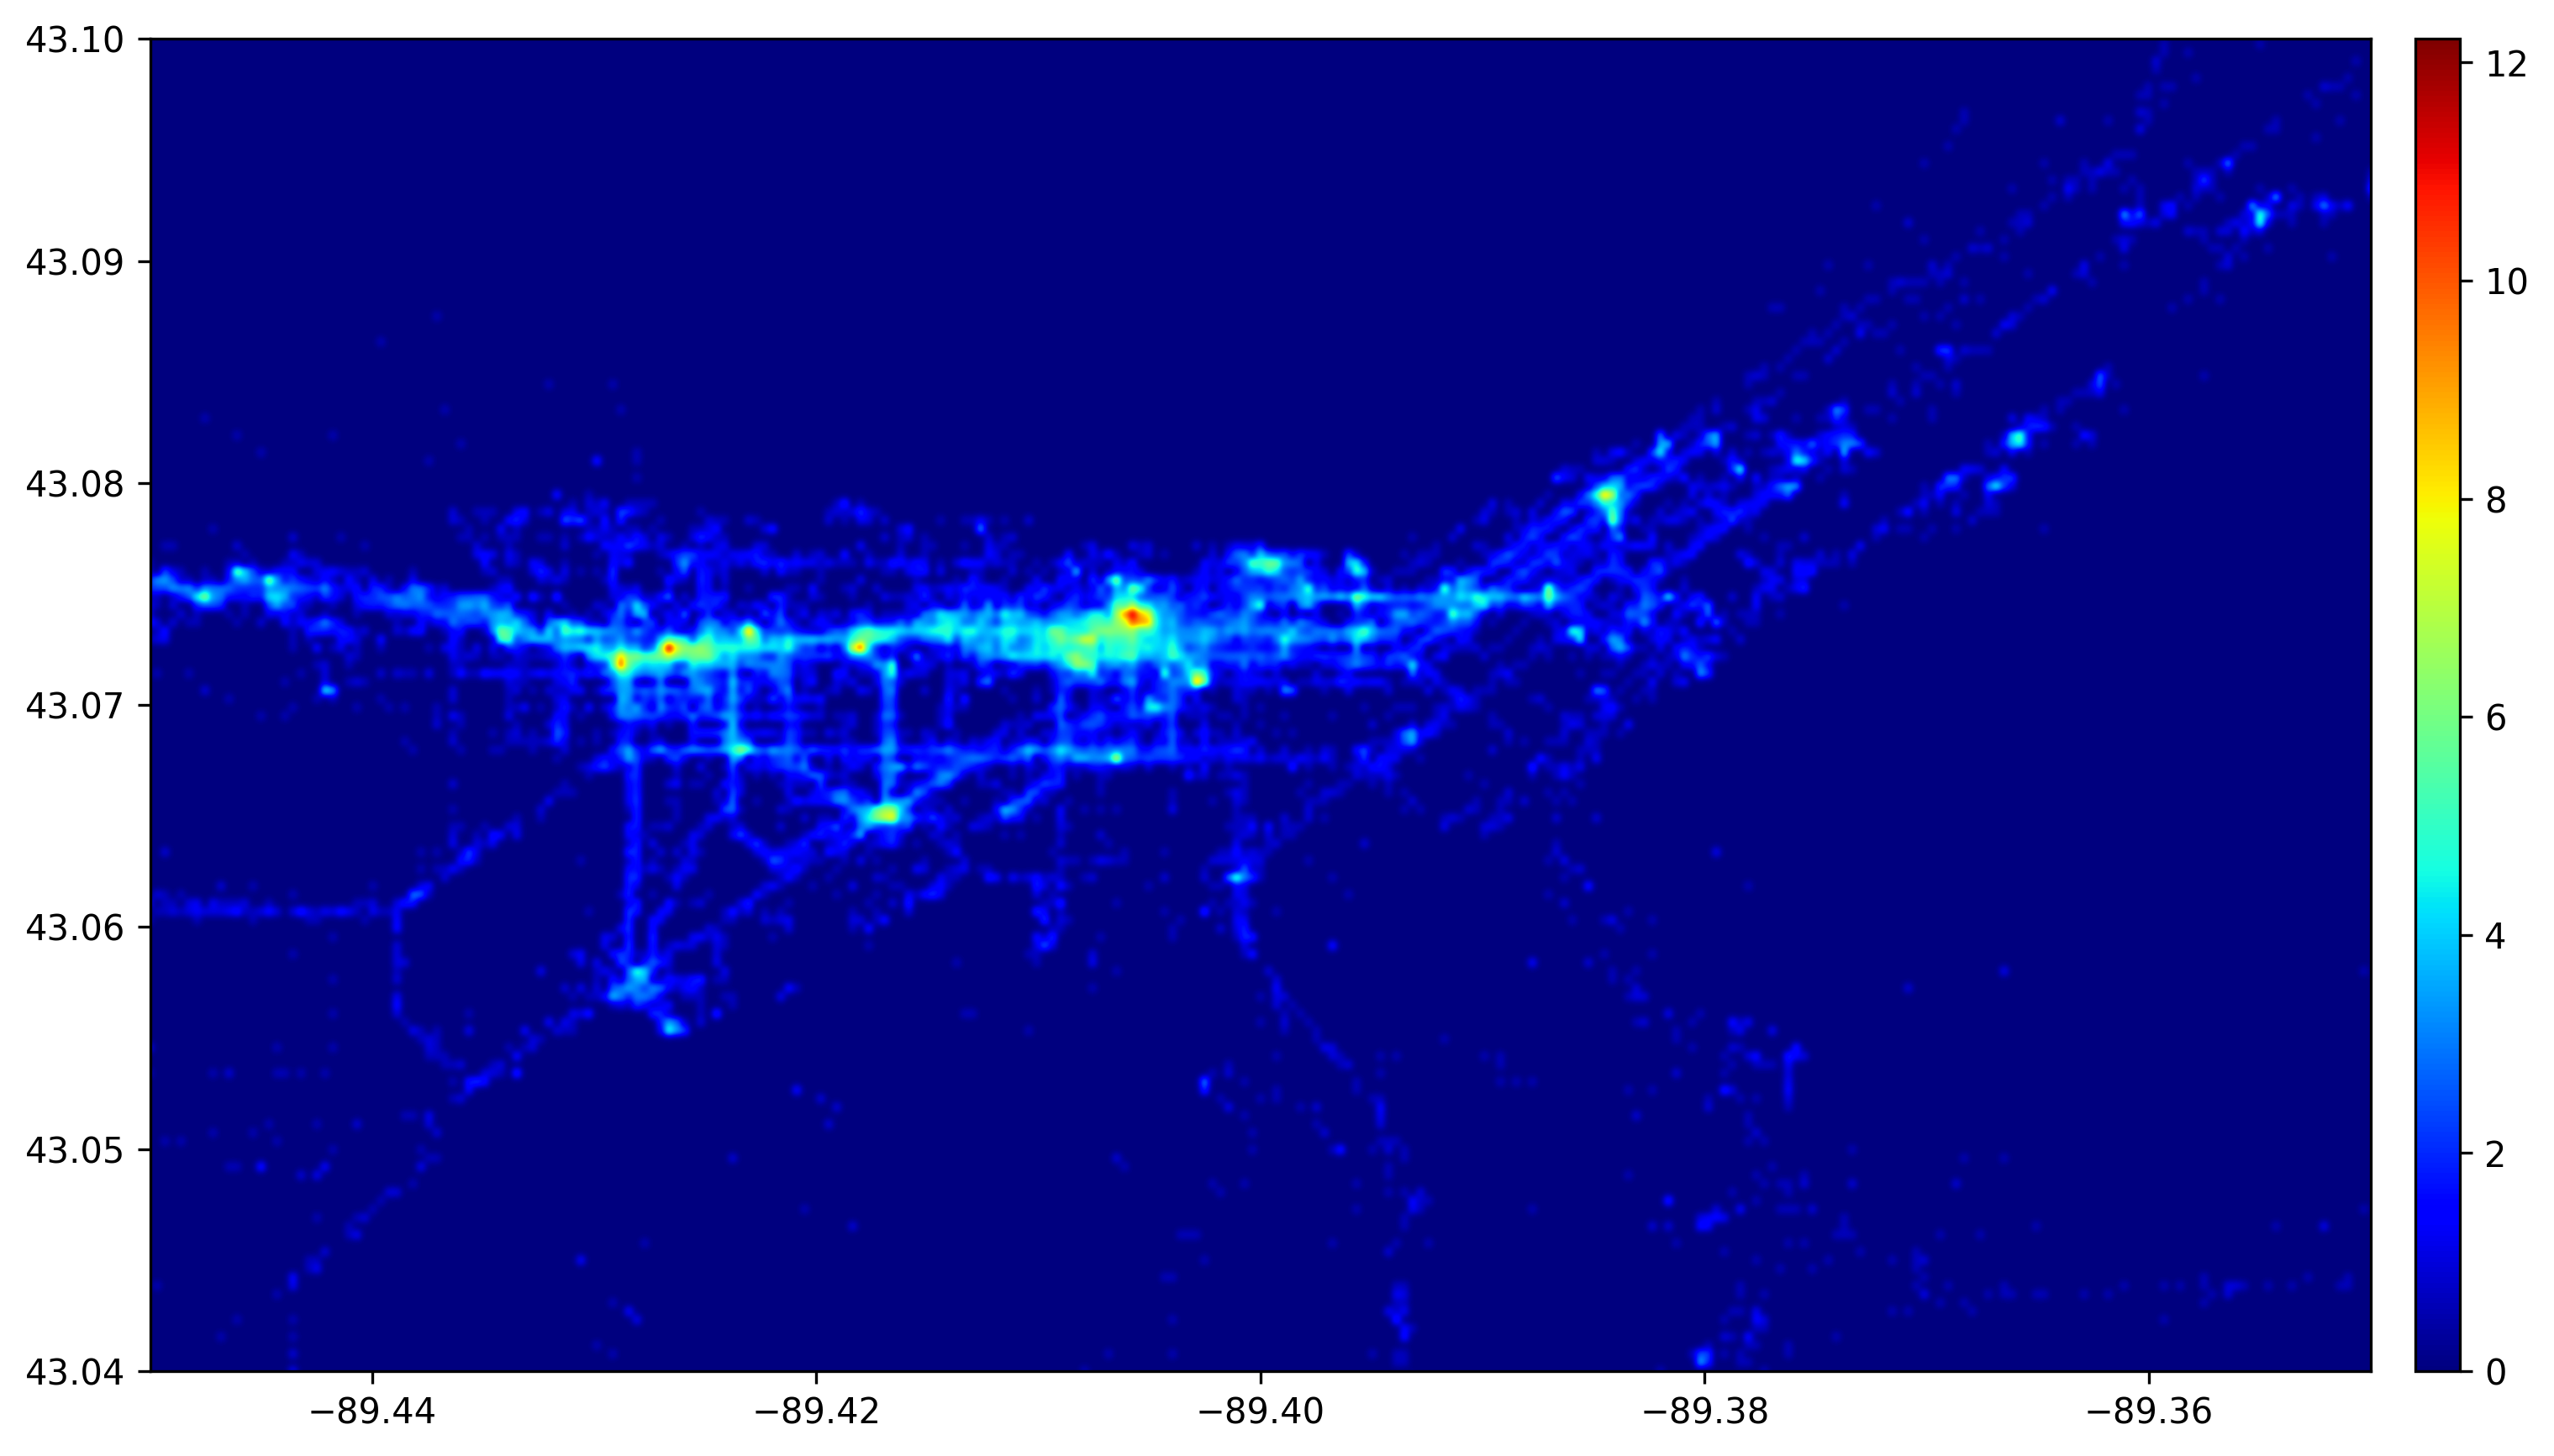

In [612]:
full = False
fig,ax = plt.subplots(dpi=300,figsize=(13,7))
cmap = 'jet'#'afmhot'

# inds = [random.randint(len(xd)) for x in range(10000)]
# ax.scatter(xd[inds],yd[inds],s=0.01,marker='.',c='green')
# ax.scatter(xd,yd,s=0.01,marker='.',c='green')
axmap = ax.imshow(log(counts+1),extent=[xmin,xmax,ymin,ymax],cmap=cmap,interpolation='gaussian')
# city.plot(ax=ax,color='navy')

# cax = ax.contour(log(flipud(counts)+1),extent=[xmin,xmax,ymin,ymax])
if not full:
    ax.set_xlim((-89.45,-89.35))
    ax.set_ylim((43.04,43.10))
cax = ax.inset_axes([1.02, 0.0, .02, 1], transform=ax.transAxes)
fig.colorbar(axmap,cax)
# savefigure(f'madison_heatmap_nx{nx}_ny{ny}_{fullstr}_{cmap}.png')

In [602]:
# savefigure(f'madison_heatmap_nx{nx}_ny{ny}_{fullstr}_{cmap}.png')

saved file to .\Images\madison_heatmap_nx50_ny50_full_jet_5811.png


<Figure size 432x288 with 0 Axes>

In [533]:
# do independent component analysis on the data

# 1. bin the data by time, just by chunking the coordinate pairs into N sequences of some length n
# 2. generate the 'counts' matrix with hist2d from each of these sequences
# 3. run sklearn.fastICA on the N counts matrices
# 4. project each counts matrix with the resulting mixing matrix and sum

In [303]:
max(lon)

7.4301365

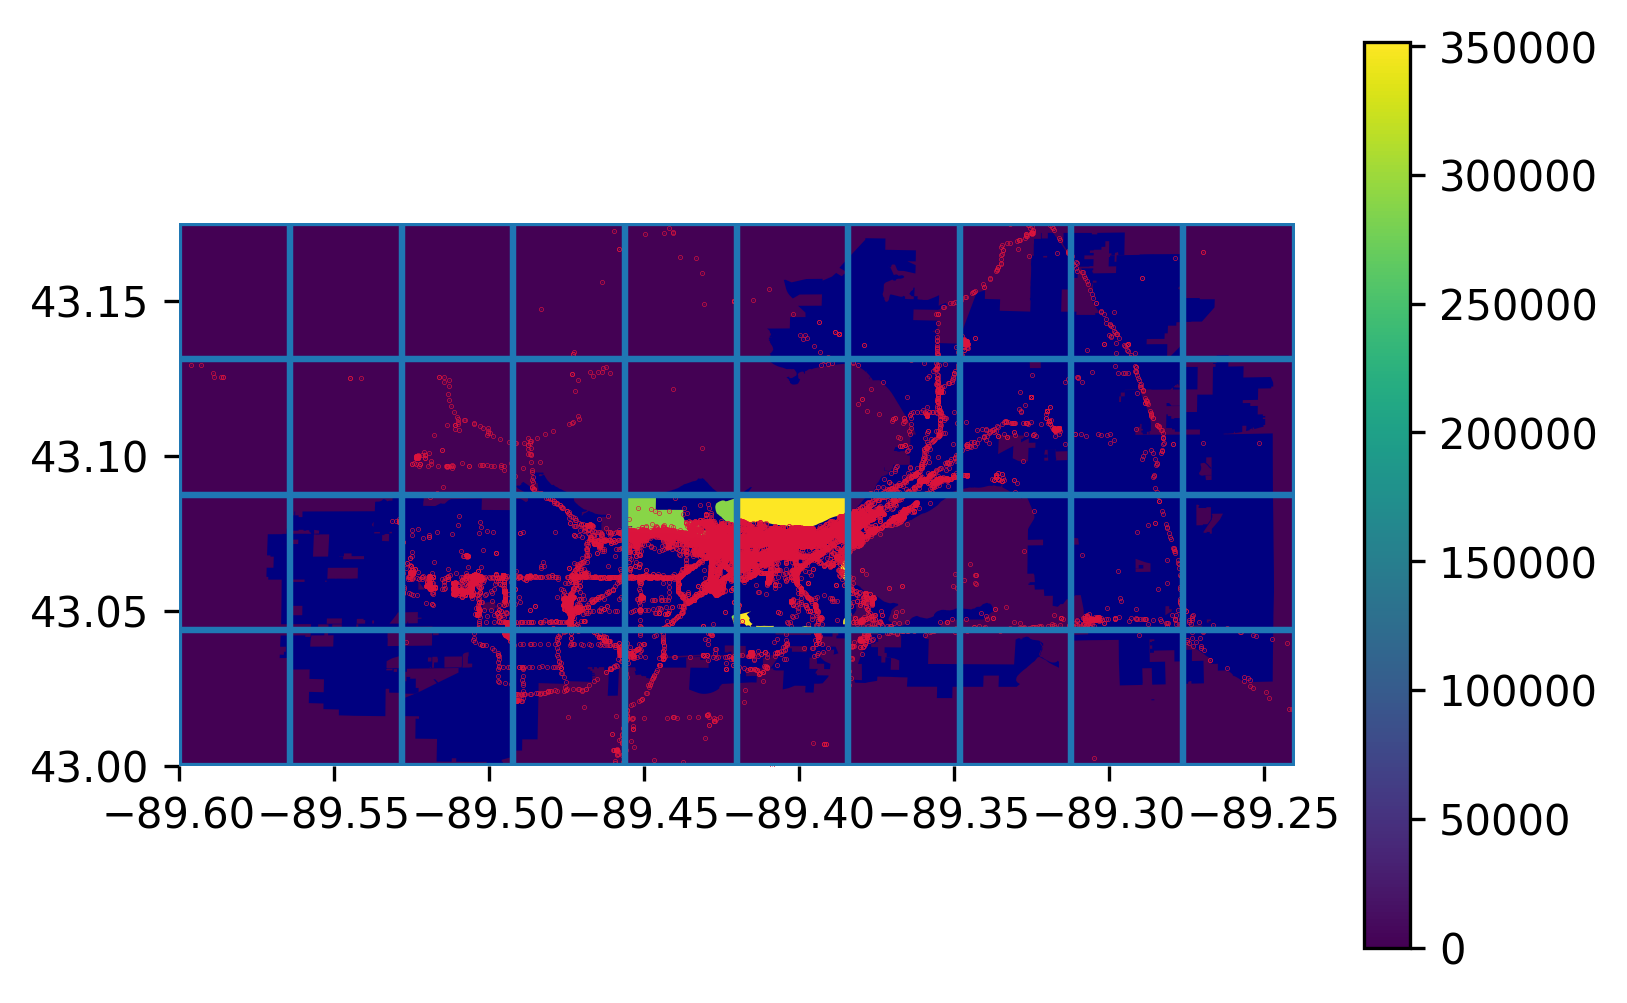

In [314]:
fig, ax = plt.subplots(dpi=300)
city.plot(ax=ax,color='navy')
ax.scatter(lon,lat,s=.1,marker='.',color='crimson')
# ax.set_facecolor('mediumaquamarine')
# ax.set_xlim((-89.6,-89.24))
# ax.set_ylim((43,43.175))
# ax.set_axis_off()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])

for i in range(nx):
    ax.axvline(xmin+(xmax-xmin)*(i/nx))
    ax.axvline(xmax-(xmax-xmin)*((nx-i-1)/nx))
for i in range(ny):
    ax.axhline(ymin+(ymax-ymin)*(i/ny))
    ax.axhline(ymax-(ymax-ymin)*((ny-i-1)/ny))
    
# ax.set_xlim(xlims)
# ax.set_ylim(ylims)

cax = ax.imshow(counts,extent=[xmin,xmax,ymin,ymax])
# cax = ax.contour(counts,extent=[xmin,xmax,ymin,ymax])
fig.colorbar(cax)
plt.show()

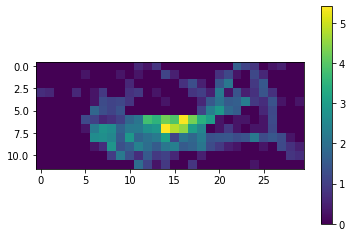

In [391]:
plt.imshow(log10(counts+1))
plt.colorbar()

In [297]:
xmin,xmax

(-112.00979819999999, 7.4301365)

## misc testing

In [516]:
def hist2d(data,nx,ny=None,xlims=None,ylims=None):
    """
    returns a 2d array of occurence for a 2d-tuple coordinates within ny by nx bins
    
    args:
        data: 2d array or list of coordinates [[x1,x2,...],[y1,y2,...]]
        nx: equal to the number of evenly spaced "vertical" slices to be made plus one when cutting up the data space
        ny: like binsx but "horizontal" slices.
        xlims: a tuple of limits (xmin,xmax) of type float
        ylims: a tuple of limits (ymin,ymax) of type float
    returns:
        counts: 2d array of shape (ny,nx) containing the number of occurences of data in each bin
        xlims: a tuple (xmin,xmax)
        ylims: a tuple (ymin,ymax)
        
    1. get the min/max of the x and y data if not specified
    2. bins pairs in x by the x values
    3. for each x bin, bins the pairs by y values
    """
    if ny==None:
        ny=nx
        
    xd,yd = data
    if not (xlims or ylims):
        data = array([(x,y) for x,y in zip(xd,yd)],dtype='object')
 
    if xlims != None:
        xmin,xmax = xlims
        data = array([(x,y) for x,y in zip(xd,yd) if xmin<x<xmax],dtype='object')
    else:
        xmin = min(xd)
        xmax = max(xd)
        # we do not filter the data here, bc we are using its full range in x
    if ylims != None:
        ymin,ymax = ylims
        data = array([(x,y) for x,y in zip(xd,yd) if ymin<y<ymax],dtype='object')
    else:
        ymin = min(yd)
        ymax = max(yd)
        # we do not filter the data here, bc we are using its full range in y
    
    print(ymin,ymax,xmin,xmax)
    
    xbins = array([[p for p in data if xmin+(xmax-xmin)*(i/nx)<=p[0]<=xmax-(xmax-xmin)*((nx-i-1)/nx)] 
                    for i in range(nx)],dtype='object')
    counts = empty((ny,nx))
    for xi,xb in enumerate(xbins):
        ybins = array([[p for p in xb if
                        ymin+(ymax-ymin)*(i/ny)<=p[1]<=ymax-(ymax-ymin)*((ny-i-1)/ny)] 
                        for i in range(ny)],dtype='object')
        counts[:,xi] = [len(yb) for yb in flip(ybins)]
    return counts, (xmin,xmax), (ymin,ymax)

In [353]:
min(test[0])

0.012532871278544633

In [593]:
# test = [random.rand(100),random.rand(100)]
xpts = linspace(0,1,200)
test = [xpts+0.01*random.rand(200),xpts]

0.0 1.0 0.0005127730901112182 1.0075325629835026


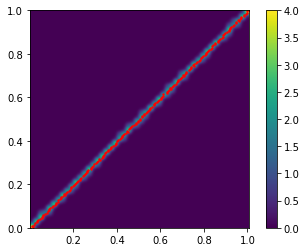

In [595]:
# test the function
nx = 50 # xbins
ny = 50
counts,xlims,ylims = hist2d(test,nx,ny)#,(0,1),(0,1))
xmin,xmax = xlims
ymin,ymax = ylims

plt.scatter(test[0],test[1],color='red',s=2)
cax = plt.imshow(counts,extent=[xmin,xmax,ymin,ymax],interpolation='gaussian')
plt.colorbar(cax)
# plt.xlim((xmin,xmax))
# plt.ylim((ymin,ymax))
fig.dpi=200

In [495]:
counts

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [484]:
# test binning procedure

dtype = [('x',float),('y',float)]
samps = 100
test = array([(random.rand(),random.rand()) for i in range(samps)],dtype=dtype)
# data = [random.rand(100),random.rand(100)]
# xd,yd = data
data = array([(x,y) for x,y in zip(xd,yd)],dtype=dtype)
xsort = sort(test,order='x')
ysort = sort(test,order='y')
xmin = xsort[0][0]
xmax = xsort[-1][0]
ymin = ysort[0][1]
ymax = ysort[-1][1]
nx = 5 # xbins
xbins = array([[p for p in xsort if xmin+(xmax-xmin)*(i/nx)<=p[0]<=xmax-(xmax-xmin)*((nx-i-1)/nx)] for i in range(nx)],dtype='object')
ny = 3
# counts = empty((nx,ny))
counts = empty((ny,nx))
for xi,xb in enumerate(xbins):
    ysort = sort(array(xb,dtype=dtype),order='y')
    ybins = array([[p for p in ysort if 
                    ymin+(ymax-ymin)*(i/ny)<=p[1]<=ymax-(ymax-ymin)*((ny-i-1)/ny)] 
                    for i in range(ny)],dtype='object')
#     counts[xi,:] = [len(yb) for yb in flip(ybins)]
    counts[:,xi] = [len(yb) for yb in flip(ybins)]

In [485]:
# test binning procedure

dtype = [('x',float),('y',float)]
# samps = 100
# test = array([(random.rand(),random.rand()) for i in range(samps)],dtype=dtype)
data = [random.rand(100),random.rand(100)]
xd,yd = data
data = array([(x,y) for x,y in zip(xd,yd)],dtype=dtype)
xsort = sort(data,order='x')
ysort = sort(data,order='y')
xmin = xsort[0][0]
xmax = xsort[-1][0]
ymin = ysort[0][1]
ymax = ysort[-1][1]
nx = 5 # xbins
xbins = array([[p for p in xsort if xmin+(xmax-xmin)*(i/nx)<=p[0]<=xmax-(xmax-xmin)*((nx-i-1)/nx)] for i in range(nx)],dtype='object')
ny = 3
# counts = empty((nx,ny))
counts = empty((ny,nx))
for xi,xb in enumerate(xbins):
    ysort = sort(array(xb,dtype=dtype),order='y')
    ybins = array([[p for p in ysort if 
                    ymin+(ymax-ymin)*(i/ny)<=p[1]<=ymax-(ymax-ymin)*((ny-i-1)/ny)] 
                    for i in range(ny)],dtype='object')
#     counts[xi,:] = [len(yb) for yb in flip(ybins)]
    counts[:,xi] = [len(yb) for yb in flip(ybins)]

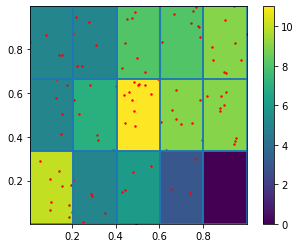

In [486]:
x = array([t[0] for t in data])
y = array([t[1] for t in data])
plt.scatter(x,y,color='red',s=2)
for i in range(nx):
    plt.axvline(xmin+(xmax-xmin)*(i/nx))
    plt.axvline(xmax-(xmax-xmin)*((nx-i-1)/nx))
for i in range(ny):
    plt.axhline(ymin+(ymax-ymin)*(i/ny))
    plt.axhline(ymax-(ymax-ymin)*((ny-i-1)/ny))

# cax = plt.imshow(counts.transpose(),extent=[xmin,xmax,ymin,ymax])
cax = plt.imshow(counts,extent=[xmin,xmax,ymin,ymax])
# cax = plt.contour(counts,extent=[xmin,xmax,ymin,ymax])
plt.colorbar(cax)
plt.xlim((xmin,xmax))
plt.ylim((ymin,ymax))
fig.dpi=200

In [398]:
dat = array(range(20))

In [399]:
2*dat,dat*2+1

(array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38]),
 array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39]))

In [401]:
[(x,y) for x,y in zip(2*dat,dat*2+1) if 3<x<9]
[(x,y) for x,y in zip(2*dat,dat*2+1) if 3<y<9]

[(4, 5), (6, 7), (8, 9)]